In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataframe
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
k = df.groupby('stars').mean()

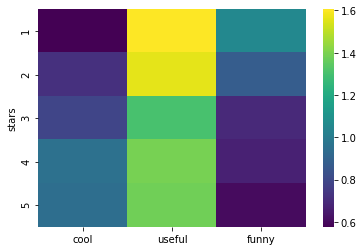

In [7]:
# heatmap for reviews
sns.heatmap(k,cmap='viridis')
plt.show()

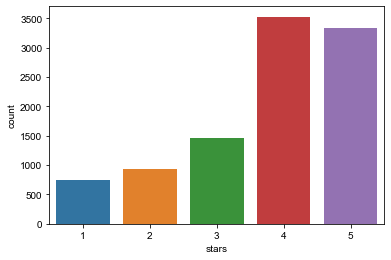

In [8]:
sns.countplot(df['stars'])
sns.set_style('whitegrid')
plt.show()

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [10]:
all_words = stopwords.words('english')
all_words.remove('not')

In [11]:
ps = PorterStemmer()
corpus = []
for i in range(len(df)):
    rev = df['text'][i].lower()
    rev = re.findall('[\w]+',rev)
    stem_sent = [ps.stem(word) for word in rev if word not in set(all_words)]
    corpus.append(' '.join(stem_sent))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(max_features=)
x = cv.fit_transform(corpus).toarray()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,df['stars'],test_size=0.33)

In [15]:
from sklearn.svm import SVC

In [22]:
pred = SVC().fit(x_train,y_train).predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 56  26  13  92  75]
 [ 16  25  35 176  63]
 [  3   7  58 349  67]
 [  4   2  23 728 382]
 [  1   0   8 368 723]]
              precision    recall  f1-score   support

           1       0.70      0.21      0.33       262
           2       0.42      0.08      0.13       315
           3       0.42      0.12      0.19       484
           4       0.42      0.64      0.51      1139
           5       0.55      0.66      0.60      1100

    accuracy                           0.48      3300
   macro avg       0.50      0.34      0.35      3300
weighted avg       0.49      0.48      0.44      3300

